## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9643220	total: 64.6ms	remaining: 1m 4s
1:	learn: 0.9460570	total: 65.5ms	remaining: 32.7s
2:	learn: 0.9261773	total: 66.3ms	remaining: 22s
3:	learn: 0.9103350	total: 67.4ms	remaining: 16.8s
4:	learn: 0.8926469	total: 68.2ms	remaining: 13.6s
5:	learn: 0.8765104	total: 69.2ms	remaining: 11.5s
6:	learn: 0.8618436	total: 70.2ms	remaining: 9.96s
7:	learn: 0.8467739	total: 71.7ms	remaining: 8.89s
8:	learn: 0.8325188	total: 72.6ms	remaining: 7.99s
9:	learn: 0.8165358	total: 73.4ms	remaining: 7.26s
10:	learn: 0.8037804	total: 74.2ms	remaining: 6.67s
11:	learn: 0.7903255	total: 74.9ms	remaining: 6.17s
12:	learn: 0.7772938	total: 75.6ms	remaining: 5.74s
13:	learn: 0.7634357	total: 76.3ms	remaining: 5.37s
14:	learn: 0.7501651	total: 77ms	remaining: 5.06s
15:	learn: 0.7365432	total: 77.7ms	remaining: 4.78s
16:	learn: 0.7240645	total: 78.5ms	remaining: 4.54s
17:	learn: 0.7112217	total: 79.3ms	remaining: 4.33s
18:	learn: 0.6988930	total: 80.2ms	remaining: 4.

20:	learn: 0.6738996	total: 81.9ms	remaining: 3.82s
21:	learn: 0.6641112	total: 82.8ms	remaining: 3.68s
22:	learn: 0.6529463	total: 83.5ms	remaining: 3.55s
23:	learn: 0.6433675	total: 84.5ms	remaining: 3.44s
24:	learn: 0.6328043	total: 85.5ms	remaining: 3.33s
25:	learn: 0.6228849	total: 86.3ms	remaining: 3.23s
26:	learn: 0.6142599	total: 87.1ms	remaining: 3.14s
27:	learn: 0.6055302	total: 87.8ms	remaining: 3.05s
28:	learn: 0.5961872	total: 88.6ms	remaining: 2.97s
29:	learn: 0.5866825	total: 89.5ms	remaining: 2.89s
30:	learn: 0.5782134	total: 90.4ms	remaining: 2.83s
31:	learn: 0.5697605	total: 91.3ms	remaining: 2.76s
32:	learn: 0.5627940	total: 92.1ms	remaining: 2.7s
33:	learn: 0.5552837	total: 92.8ms	remaining: 2.64s
34:	learn: 0.5475406	total: 93.5ms	remaining: 2.58s
35:	learn: 0.5399808	total: 94.4ms	remaining: 2.53s
36:	learn: 0.5342121	total: 95.2ms	remaining: 2.48s
37:	learn: 0.5274201	total: 96ms	remaining: 2.43s
38:	learn: 0.5205784	total: 96.8ms	remaining: 2.38s
39:	learn: 0.51

142:	learn: 0.2632663	total: 186ms	remaining: 1.11s
143:	learn: 0.2625404	total: 187ms	remaining: 1.11s
144:	learn: 0.2615046	total: 188ms	remaining: 1.11s
145:	learn: 0.2608061	total: 189ms	remaining: 1.1s
146:	learn: 0.2597176	total: 189ms	remaining: 1.1s
147:	learn: 0.2591363	total: 190ms	remaining: 1.09s
148:	learn: 0.2582477	total: 191ms	remaining: 1.09s
149:	learn: 0.2577664	total: 192ms	remaining: 1.09s
150:	learn: 0.2572686	total: 193ms	remaining: 1.08s
151:	learn: 0.2563979	total: 194ms	remaining: 1.08s
152:	learn: 0.2556873	total: 194ms	remaining: 1.08s
153:	learn: 0.2547343	total: 195ms	remaining: 1.07s
154:	learn: 0.2543045	total: 196ms	remaining: 1.07s
155:	learn: 0.2533567	total: 197ms	remaining: 1.06s
156:	learn: 0.2528045	total: 198ms	remaining: 1.06s
157:	learn: 0.2525844	total: 199ms	remaining: 1.06s
158:	learn: 0.2520847	total: 199ms	remaining: 1.05s
159:	learn: 0.2514270	total: 200ms	remaining: 1.05s
160:	learn: 0.2506475	total: 201ms	remaining: 1.05s
161:	learn: 0.

239:	learn: 0.2086372	total: 271ms	remaining: 859ms
240:	learn: 0.2082568	total: 272ms	remaining: 857ms
241:	learn: 0.2077781	total: 273ms	remaining: 856ms
242:	learn: 0.2075603	total: 274ms	remaining: 854ms
243:	learn: 0.2070319	total: 275ms	remaining: 852ms
244:	learn: 0.2064582	total: 276ms	remaining: 850ms
245:	learn: 0.2059655	total: 277ms	remaining: 848ms
246:	learn: 0.2054587	total: 278ms	remaining: 846ms
247:	learn: 0.2053338	total: 278ms	remaining: 844ms
248:	learn: 0.2048766	total: 279ms	remaining: 842ms
249:	learn: 0.2042593	total: 280ms	remaining: 840ms
250:	learn: 0.2041118	total: 281ms	remaining: 838ms
251:	learn: 0.2036995	total: 282ms	remaining: 836ms
252:	learn: 0.2033046	total: 283ms	remaining: 834ms
253:	learn: 0.2029343	total: 283ms	remaining: 832ms
254:	learn: 0.2025063	total: 284ms	remaining: 830ms
255:	learn: 0.2024382	total: 285ms	remaining: 829ms
256:	learn: 0.2020490	total: 286ms	remaining: 827ms
257:	learn: 0.2014897	total: 287ms	remaining: 825ms
258:	learn: 

354:	learn: 0.1654487	total: 374ms	remaining: 680ms
355:	learn: 0.1649476	total: 375ms	remaining: 678ms
356:	learn: 0.1645211	total: 376ms	remaining: 677ms
357:	learn: 0.1639843	total: 376ms	remaining: 675ms
358:	learn: 0.1637908	total: 377ms	remaining: 673ms
359:	learn: 0.1634953	total: 378ms	remaining: 672ms
360:	learn: 0.1630098	total: 378ms	remaining: 670ms
361:	learn: 0.1625712	total: 379ms	remaining: 668ms
362:	learn: 0.1621642	total: 380ms	remaining: 667ms
363:	learn: 0.1616603	total: 381ms	remaining: 665ms
364:	learn: 0.1613509	total: 381ms	remaining: 664ms
365:	learn: 0.1607224	total: 382ms	remaining: 662ms
366:	learn: 0.1605787	total: 383ms	remaining: 661ms
367:	learn: 0.1601644	total: 384ms	remaining: 660ms
368:	learn: 0.1597003	total: 385ms	remaining: 659ms
369:	learn: 0.1593771	total: 386ms	remaining: 658ms
370:	learn: 0.1588590	total: 387ms	remaining: 657ms
371:	learn: 0.1585816	total: 388ms	remaining: 655ms
372:	learn: 0.1582758	total: 389ms	remaining: 654ms
373:	learn: 

453:	learn: 0.1357890	total: 460ms	remaining: 553ms
454:	learn: 0.1355826	total: 461ms	remaining: 552ms
455:	learn: 0.1354870	total: 462ms	remaining: 551ms
456:	learn: 0.1351794	total: 463ms	remaining: 550ms
457:	learn: 0.1351059	total: 464ms	remaining: 550ms
458:	learn: 0.1346937	total: 466ms	remaining: 549ms
459:	learn: 0.1343342	total: 467ms	remaining: 548ms
460:	learn: 0.1339777	total: 468ms	remaining: 547ms
461:	learn: 0.1336699	total: 469ms	remaining: 546ms
462:	learn: 0.1333225	total: 470ms	remaining: 545ms
463:	learn: 0.1332049	total: 471ms	remaining: 544ms
464:	learn: 0.1329950	total: 472ms	remaining: 543ms
465:	learn: 0.1329157	total: 473ms	remaining: 542ms
466:	learn: 0.1325192	total: 474ms	remaining: 541ms
467:	learn: 0.1324146	total: 475ms	remaining: 540ms
468:	learn: 0.1322168	total: 476ms	remaining: 539ms
469:	learn: 0.1321809	total: 477ms	remaining: 538ms
470:	learn: 0.1318176	total: 479ms	remaining: 538ms
471:	learn: 0.1315228	total: 480ms	remaining: 537ms
472:	learn: 

539:	learn: 0.1167968	total: 566ms	remaining: 482ms
540:	learn: 0.1165043	total: 569ms	remaining: 483ms
541:	learn: 0.1163219	total: 572ms	remaining: 484ms
542:	learn: 0.1159223	total: 574ms	remaining: 483ms
543:	learn: 0.1157361	total: 576ms	remaining: 483ms
544:	learn: 0.1155107	total: 578ms	remaining: 483ms
545:	learn: 0.1152995	total: 581ms	remaining: 483ms
546:	learn: 0.1149694	total: 582ms	remaining: 482ms
547:	learn: 0.1146510	total: 583ms	remaining: 481ms
548:	learn: 0.1144358	total: 585ms	remaining: 480ms
549:	learn: 0.1142941	total: 586ms	remaining: 479ms
550:	learn: 0.1141098	total: 589ms	remaining: 480ms
551:	learn: 0.1139285	total: 591ms	remaining: 480ms
552:	learn: 0.1137091	total: 594ms	remaining: 480ms
553:	learn: 0.1134813	total: 595ms	remaining: 479ms
554:	learn: 0.1132337	total: 596ms	remaining: 478ms
555:	learn: 0.1130621	total: 597ms	remaining: 477ms
556:	learn: 0.1129971	total: 598ms	remaining: 476ms
557:	learn: 0.1127688	total: 600ms	remaining: 475ms
558:	learn: 

603:	learn: 0.1048119	total: 645ms	remaining: 423ms
604:	learn: 0.1045768	total: 647ms	remaining: 422ms
605:	learn: 0.1042717	total: 648ms	remaining: 421ms
606:	learn: 0.1040495	total: 648ms	remaining: 420ms
607:	learn: 0.1038196	total: 649ms	remaining: 419ms
608:	learn: 0.1036142	total: 650ms	remaining: 417ms
609:	learn: 0.1034463	total: 651ms	remaining: 416ms
610:	learn: 0.1033841	total: 652ms	remaining: 415ms
611:	learn: 0.1031874	total: 653ms	remaining: 414ms
612:	learn: 0.1030300	total: 653ms	remaining: 412ms
613:	learn: 0.1029756	total: 654ms	remaining: 411ms
614:	learn: 0.1027931	total: 655ms	remaining: 410ms
615:	learn: 0.1025827	total: 656ms	remaining: 409ms
616:	learn: 0.1023344	total: 657ms	remaining: 408ms
617:	learn: 0.1022697	total: 657ms	remaining: 406ms
618:	learn: 0.1021826	total: 658ms	remaining: 405ms
619:	learn: 0.1020391	total: 659ms	remaining: 404ms
620:	learn: 0.1019969	total: 660ms	remaining: 403ms
621:	learn: 0.1018411	total: 661ms	remaining: 401ms
622:	learn: 

724:	learn: 0.0870363	total: 754ms	remaining: 286ms
725:	learn: 0.0869455	total: 755ms	remaining: 285ms
726:	learn: 0.0868378	total: 756ms	remaining: 284ms
727:	learn: 0.0867403	total: 757ms	remaining: 283ms
728:	learn: 0.0866292	total: 758ms	remaining: 282ms
729:	learn: 0.0865119	total: 759ms	remaining: 281ms
730:	learn: 0.0864229	total: 760ms	remaining: 280ms
731:	learn: 0.0862612	total: 761ms	remaining: 278ms
732:	learn: 0.0861152	total: 761ms	remaining: 277ms
733:	learn: 0.0859510	total: 763ms	remaining: 276ms
734:	learn: 0.0857578	total: 764ms	remaining: 275ms
735:	learn: 0.0855229	total: 765ms	remaining: 274ms
736:	learn: 0.0855062	total: 766ms	remaining: 273ms
737:	learn: 0.0854390	total: 767ms	remaining: 272ms
738:	learn: 0.0852867	total: 768ms	remaining: 271ms
739:	learn: 0.0852530	total: 769ms	remaining: 270ms
740:	learn: 0.0851738	total: 770ms	remaining: 269ms
741:	learn: 0.0851486	total: 771ms	remaining: 268ms
742:	learn: 0.0850150	total: 772ms	remaining: 267ms
743:	learn: 

814:	learn: 0.0768524	total: 835ms	remaining: 190ms
815:	learn: 0.0767611	total: 836ms	remaining: 188ms
816:	learn: 0.0767212	total: 837ms	remaining: 187ms
817:	learn: 0.0765822	total: 838ms	remaining: 186ms
818:	learn: 0.0764826	total: 839ms	remaining: 185ms
819:	learn: 0.0763211	total: 840ms	remaining: 184ms
820:	learn: 0.0762201	total: 840ms	remaining: 183ms
821:	learn: 0.0761194	total: 841ms	remaining: 182ms
822:	learn: 0.0760382	total: 842ms	remaining: 181ms
823:	learn: 0.0759353	total: 843ms	remaining: 180ms
824:	learn: 0.0758249	total: 844ms	remaining: 179ms
825:	learn: 0.0757882	total: 845ms	remaining: 178ms
826:	learn: 0.0757221	total: 846ms	remaining: 177ms
827:	learn: 0.0755798	total: 846ms	remaining: 176ms
828:	learn: 0.0753974	total: 847ms	remaining: 175ms
829:	learn: 0.0752990	total: 848ms	remaining: 174ms
830:	learn: 0.0752082	total: 849ms	remaining: 173ms
831:	learn: 0.0751202	total: 850ms	remaining: 172ms
832:	learn: 0.0750863	total: 851ms	remaining: 171ms
833:	learn: 

940:	learn: 0.0635541	total: 945ms	remaining: 59.3ms
941:	learn: 0.0634548	total: 946ms	remaining: 58.3ms
942:	learn: 0.0633855	total: 947ms	remaining: 57.3ms
943:	learn: 0.0633052	total: 948ms	remaining: 56.3ms
944:	learn: 0.0632220	total: 949ms	remaining: 55.2ms
945:	learn: 0.0631548	total: 950ms	remaining: 54.2ms
946:	learn: 0.0630808	total: 951ms	remaining: 53.2ms
947:	learn: 0.0629971	total: 951ms	remaining: 52.2ms
948:	learn: 0.0628885	total: 952ms	remaining: 51.2ms
949:	learn: 0.0627888	total: 953ms	remaining: 50.2ms
950:	learn: 0.0627153	total: 954ms	remaining: 49.2ms
951:	learn: 0.0626384	total: 955ms	remaining: 48.1ms
952:	learn: 0.0625585	total: 956ms	remaining: 47.1ms
953:	learn: 0.0624892	total: 957ms	remaining: 46.1ms
954:	learn: 0.0623492	total: 957ms	remaining: 45.1ms
955:	learn: 0.0622645	total: 958ms	remaining: 44.1ms
956:	learn: 0.0621982	total: 959ms	remaining: 43.1ms
957:	learn: 0.0621294	total: 960ms	remaining: 42.1ms
958:	learn: 0.0620155	total: 961ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

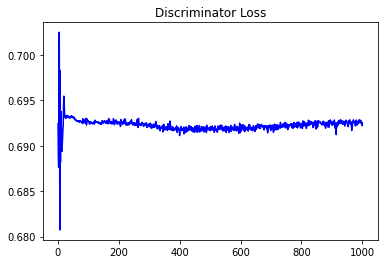

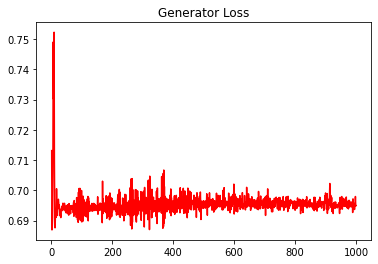

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1497115538192632


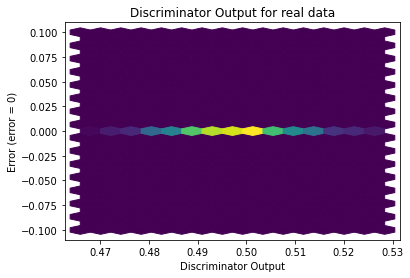

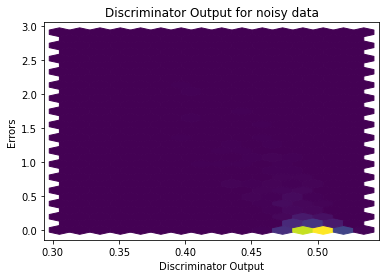

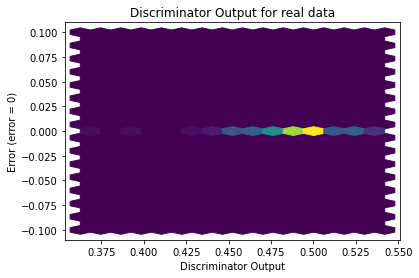

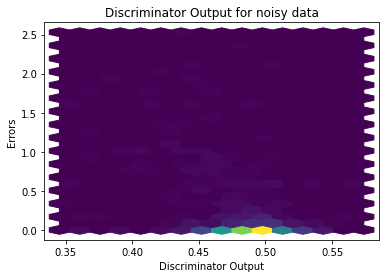

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


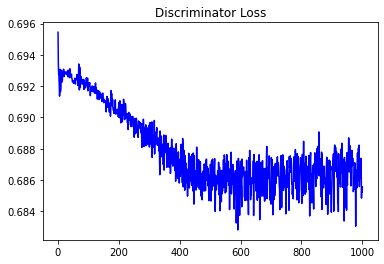

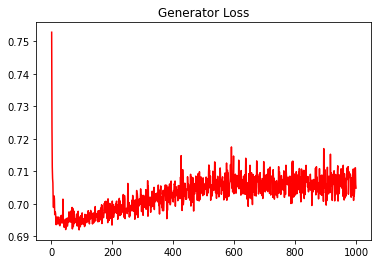

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14328104747500608


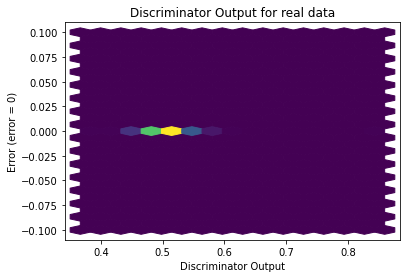

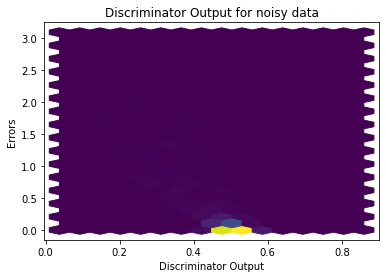

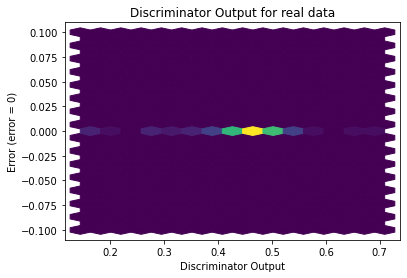

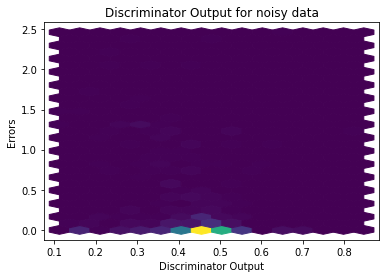

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8451]], requires_grad=True)
